In [1]:
import os
import sys
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import wavfile
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv('./data/meta/esc50.csv')
data.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [30]:
# Keep mean MFCC (60)
X = []
y = np.zeros(shape = (len(data), 1))

for i in data.index:
    
    sr, aud = wavfile.read("./data/audio/{}".format(data.loc[i, "filename"]))
    aud = aud.astype(np.float32)
    
    MFCC = librosa.feature.mfcc(y = aud, sr = sr, hop_length = 512, n_mfcc = 60)
    
    out = np.mean(MFCC.T, axis = 0)
    
    #chromagram = librosa.feature.chroma_stft(y = aud, sr = sr, hop_length = 512,
    #                                         win_length = 1024, n_chroma = 60)
    #delta = librosa.feature.delta(MFCC)
    
    #instance = np.dstack((MFCC, chromagram, delta))
    
    X += [out]
    
    y[i] = data.loc[i, "target"]
    
X = np.array(X)

In [31]:
from sklearn.preprocessing import StandardScaler

stds = StandardScaler()
X_new = stds.fit_transform(X)

In [39]:
from gng import GrowingNeuralGas

gnn = GrowingNeuralGas(X_new)

   Pass #1
   Pass #2
   Pass #3
   Pass #4
   Pass #5
   Pass #6
   Pass #7
   Pass #8


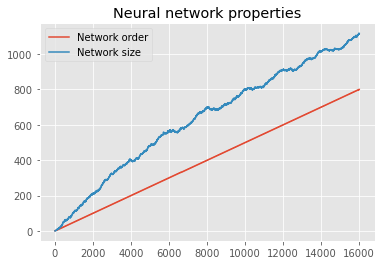

In [40]:
# a_max: maximum age
# a: alpha
# l: lambda
gnn.fit_network(e_b = 0.05, e_n = 0.005, a_max = 10, l = 20,
                a = 0.5, d = 0.995, passes = 8,
                plot_evolution = False)

In [41]:
# 1 try (e_b = 0.1, e_n = 0.005, a_max = 10, l = 20): 36040.17
# 2 try (e_b = 0.5, e_n = 0.1, a_max = 10, l = 20): 28533.98
# 3 try (e_b = 0.05, e_n = 0.005, a_max = 10, l = 20): 47236.77
print(gnn.compute_global_error())

clusters = gnn.cluster_data()
dimred = gnn.reduce_dimension(clusters)
print(gnn.number_of_clusters())

47236.77919526529
5
